<a href="https://www.kaggle.com/code/parisrohan/rp-titanic-1?scriptVersionId=90866841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load data and required libraries

In [2]:
#Load required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load train data
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Load test data
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Get the dataset shape
df_train.shape, df_test.shape

((891, 12), (418, 11))

Observation: Train dataset has 891 rows and 12 columns; Test data has 418 rows and 11 columns

## EDA on train dataset

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Functon to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [8]:
#Missing values in train data
print(get_cols_with_missing_values(df_train))

Age         177
Cabin       687
Embarked      2
dtype: int64


Observation: The target feature 'Survived' has no missing values in train dataset

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Convert the data-type of target feature to Object as this is a classification problem.
#0 - dead , 1 - survived
df_train['Survived'] = df_train['Survived'].astype('object')

In [11]:
#Get categorical and numerical columns in train data
categorical_cols=[cname for cname in df_train.columns if df_train[cname].dtypes=='object']
numerical_cols=[cname for cname in df_train.columns if df_train[cname].dtypes!='object']

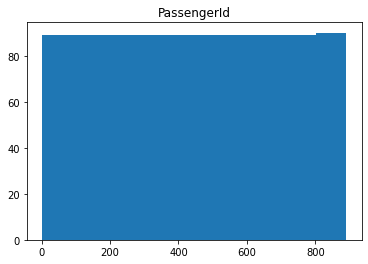

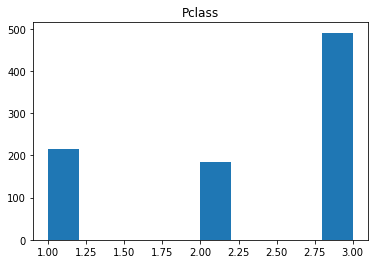

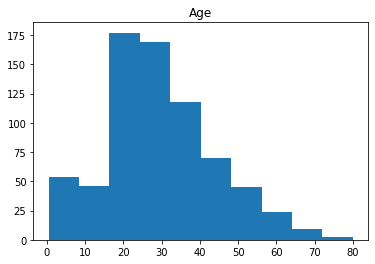

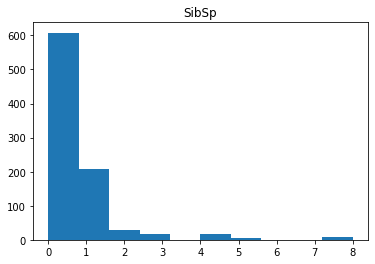

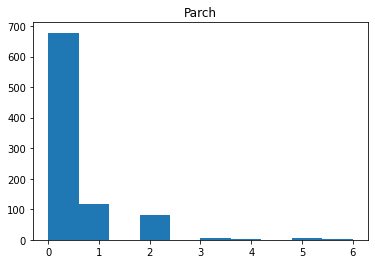

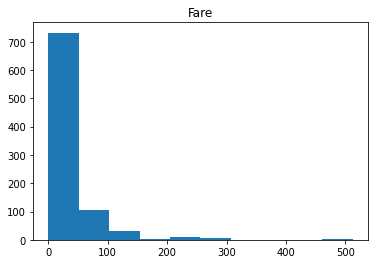

In [12]:
#Distribution of numerical data
for i in numerical_cols:
    plt.hist(df_train[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

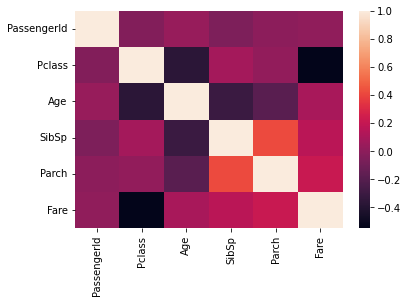

In [13]:
#Correlation
sns.heatmap(df_train[numerical_cols].corr())

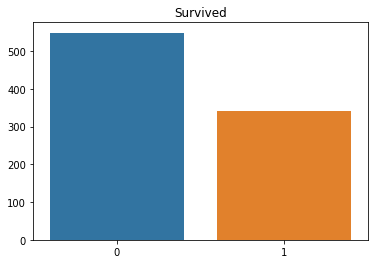

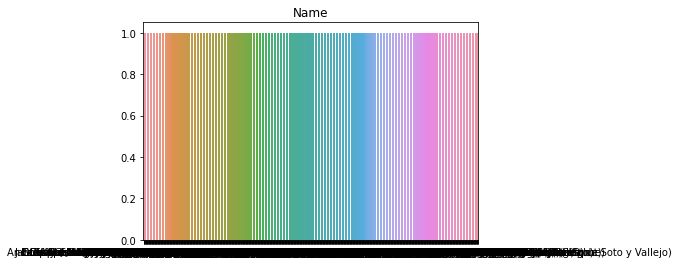

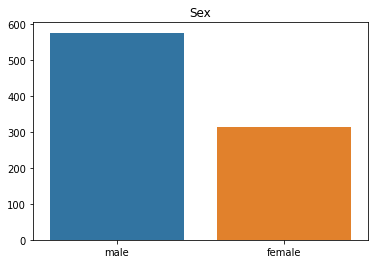

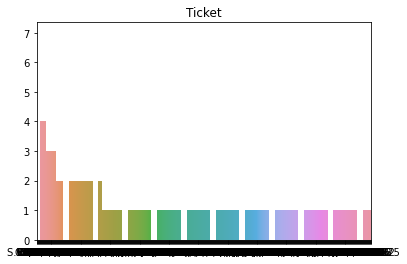

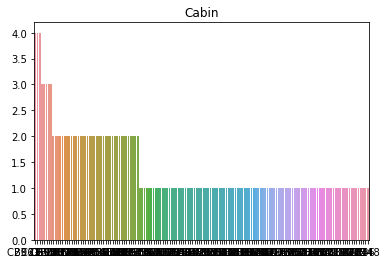

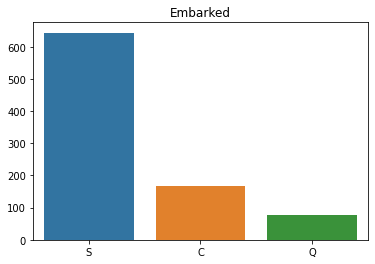

In [14]:
#Distribution of categorical data
for i in categorical_cols:
    sns.barplot(df_train[i].value_counts().index, df_train[i].value_counts().values).set_title(i)
    plt.show()

### Exploring the features

In [15]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#PassengerId - we can drop this feature during datapreprocessing.

In [18]:
#Pclass - It is the class of the ticket purchased -> A proxy for socio-economic status
#1 = Upper, 2 = Middle, 3 = Lower

#Observation - we will have to change the type of this feature to object during data preprocesing

In [19]:
#Name -
#We can perform feature engineering on Name feature to derive important features

In [20]:
#Age-
#This feature has null values
#We will consider rounding up the values in decimal

In [21]:
#SibSp - 
#Number of siblngs or spouses
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

In [22]:
#Parch - 
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

In [23]:
#Ticket - 
#Alphanumeric

#Fare -
#Passenger fare

#Cabin -
#Cabin number
#alphanumeric

#Embarked -
#S - Southampton
#C - Cherbourg
#Q - Queenstown

In [24]:
Test_passenger_id = df_test['PassengerId']

df_train.drop(["PassengerId"], axis=1, inplace=True)
df_test.drop(["PassengerId"], axis=1, inplace=True)

## Merge train and test data for data preprocessing

In [25]:
#combine train and test data for data preprocessing
df_merge=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df_merge.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN


In [26]:
df_train.shape, df_test.shape, df_merge.shape

((891, 11), (418, 10), (1309, 12))

## Handle missing values

In [27]:
#Missing values in merged data - ignore target feature 'Survived'
print(get_cols_with_missing_values(df_merge))

Age          263
Fare           1
Cabin       1014
Embarked       2
Survived     418
dtype: int64


In [28]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  ind       1309 non-null   object 
 11  Survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 132.9+ KB


In [29]:
#Handle missing categorical features

#Cabin feature has 1014/1309 vales as missing -> so we will drop this feature
df_merge.drop(["Cabin"], axis=1, inplace=True)

#Handling Missing Values in Categorical features by replacing them with the feature mode value
df_merge['Embarked'] = df_merge['Embarked'].fillna(df_merge['Embarked'].mode()[0])

In [30]:
#Handle missing numerical features
num_missing_col = ['Age', 'Fare']

#Handling Missing Values in Numerical features by replacing them with Mean value
df_merge[num_missing_col]=df_merge[num_missing_col].fillna(df_merge[num_missing_col].mean())

In [31]:
#Make sure the missing values in merged data have been handled - ignore target feature 'Survived'
print(get_cols_with_missing_values(df_merge))

Survived    418
dtype: int64


## Feature Engineering

In [32]:
#Change the type of 'Pclass' feature to 'object' as it represents socioeconomic status
df_merge['Pclass'] = df_merge['Pclass'].astype('object')

In [33]:
#Use a regular expression to get the value between the ',' and '.'
salutation_lst = []
for i in df_merge['Name']:
    match = re.search(r'.*?\s(.*?)\..*', i).group(1)
    salutation_lst.append(match)

In [34]:
#Convert the list into a dataframe
df_salutation = pd.DataFrame(salutation_lst, columns=['Salutation'])
df_salutation.index = df_merge.index
df_merge = pd.concat([df_merge, df_salutation], axis=1)

df_merge.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ind,Survived,Salutation
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,test,NaN,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,test,NaN,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,test,NaN,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,test,NaN,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,test,NaN,Mrs


In [35]:
df_merge['Salutation'].value_counts()

Mr                   736
Miss                 256
Mrs                  191
Master                59
Dr                     8
Rev                    8
Col                    4
Ms                     2
Planke, Mr             2
Major                  2
Billiard, Master       2
y More, Miss           2
Mlle                   2
y Castellana, Mr       1
Impe, Mr               1
y Manent, Mr           1
Impe, Miss             1
Gordon, Lady           1
Messemaeker, Mrs       1
the Countess           1
Gordon, Sir            1
Capt                   1
Velde, Mr              1
Carlo, Mr              1
Shawah, Mr             1
Impe, Mrs              1
Jonkheer               1
Melkebeke, Mr          1
Mme                    1
Walle, Mr              1
Steen, Mr              1
y Castellana, Mrs      1
Carlo, Mrs             1
Khalil, Mrs            1
y Rodriguez, Mr        1
Palmquist, Mr          1
Messemaeker, Mr        1
Brito, Mr              1
y Castello, Mr         1
y Ocana, Dona          1


In [36]:
Mr_sal = [val for val in df_merge['Salutation'].value_counts().index if ', Mr' in val and 'Mrs' not in val]

#df_merge['Salutation'] = df_merge['Salutation'].where(df_merge['Salutation'] i Mr_sal, )

#for i in df_merge['Salutation']:
#    if i in Mr_sal:
        

In [37]:
#use salutation to get a range of age